***In This Task , we'll predict the Percentage score of a student based on the number of hours studied. the task has 2 variables where the feature is the no. of hours studied and the target value is the percentage score .
This can be solved using simple Linear Regression***

In [2]:
#Importing required libraries**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [53]:
import warnings
warnings.filterwarnings('ignore')

***Reading*** ***Data***

In [3]:
url= "http://bit.ly/w-data"
dataset= pd.read_csv(url)

***Data Exploration***

In [7]:
print(dataset.shape)

(25, 2)


In [8]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


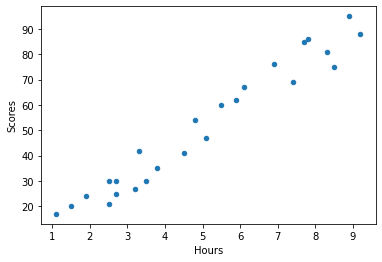

In [13]:
dataset.plot(kind= "scatter", x= "Hours", y= "Scores")
plt.show()

In [14]:
dataset.corr(method= "pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
dataset.corr(method= "spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


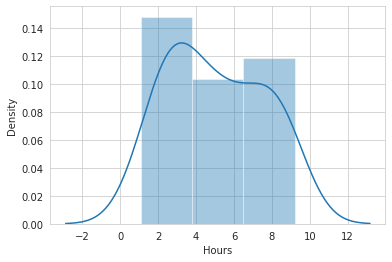

In [54]:
hours= dataset["Hours"]
scores= dataset["Scores"]
sns.distplot(hours)

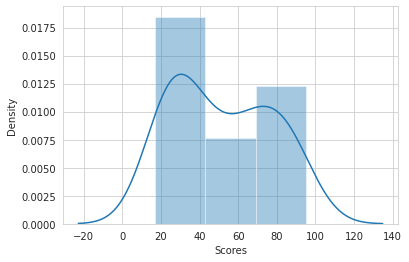

In [55]:
sns.distplot(scores)

***Linear Regression***

In [56]:
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:, 1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.2, random_state=50)


In [21]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

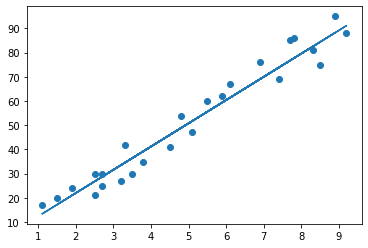

In [22]:
m= reg.coef_
c= reg.intercept_
line= m*x+c
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [23]:
y_pred= reg.predict(x_test)
actual_predicted= pd.DataFrame({'Target':y_test, 'Predicted': y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


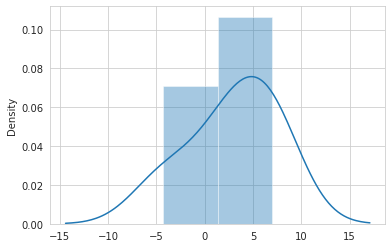

In [57]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

***Comparision ::  Actual result vs Predicted Model result***

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


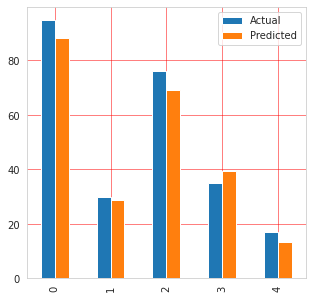

In [58]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='green')
plt.show()

***What will be predicted score if a student studies for 9.25 hrs/ day?***

In [25]:
h= 9.25
s= reg.predict([[h]])
print("If a student studies for {} hours per day, he/she will score {}% in exam".format(h,s))


If a student studies for 9.25 hours per day, he/she will score [91.56986604]% in exam


***Model Evaluation***

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score


print("Mean ABsolute error:", metrics.mean_absolute_error(y_test, y_pred))

Mean ABsolute error: 4.5916495300630285


In [27]:
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.971014141329942


***R-2 gives the score of model fit and in this case we have R-2 = 0.971014141329942 which is actually a great score for this model***

# *Conclusion*

***In this task , i successfullt carried out the Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.***

*# Thank you !*